In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

sns.set_context('poster')
sns.set_style('whitegrid')

In [46]:
df = pd.read_json('train_data.json')

In [47]:
df.columns

Index(['Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room',
       'Dishwasher', 'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness Center', 'Garden/Patio', 'Hardwood Floors',
       'High Speed Internet', 'Laundry In Building', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee',
       'Outdoor Space', 'Pre-War', 'Roof Deck', 'Swimming Pool', 'Terrace',
       'Wheelchair Access', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'index', 'interest_level',
       'latitude', 'level_0', 'listing_id', 'longitude', 'manager_id',
       'photos', 'price', 'street_address'],
      dtype='object')

@BRADEN @BRIANNA do we need to set index as the row labels on the dataframe?

#todo What do you mean by this? 
What is the index column? Like should those be our row labels because the row labels are currently 0, 100, 1000... they seem random

In [48]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [49]:
test = pd.read_json('test_data.json')

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 999
Data columns (total 41 columns):
Balcony                 7434 non-null int64
Cats Allowed            7434 non-null int64
Common Outdoor Space    7434 non-null int64
Dining Room             7434 non-null int64
Dishwasher              7434 non-null int64
Dogs Allowed            7434 non-null int64
Doorman                 7434 non-null int64
Elevator                7434 non-null int64
Exclusive               7434 non-null int64
Fitness Center          7434 non-null int64
Garden/Patio            7434 non-null int64
Hardwood Floors         7434 non-null int64
High Speed Internet     7434 non-null int64
Laundry In Building     7434 non-null int64
Laundry in Building     7434 non-null int64
Laundry in Unit         7434 non-null int64
Loft                    7434 non-null int64
New Construction        7434 non-null int64
No Fee                  7434 non-null int64
Outdoor Space           7434 non-null int64
Pre-War       

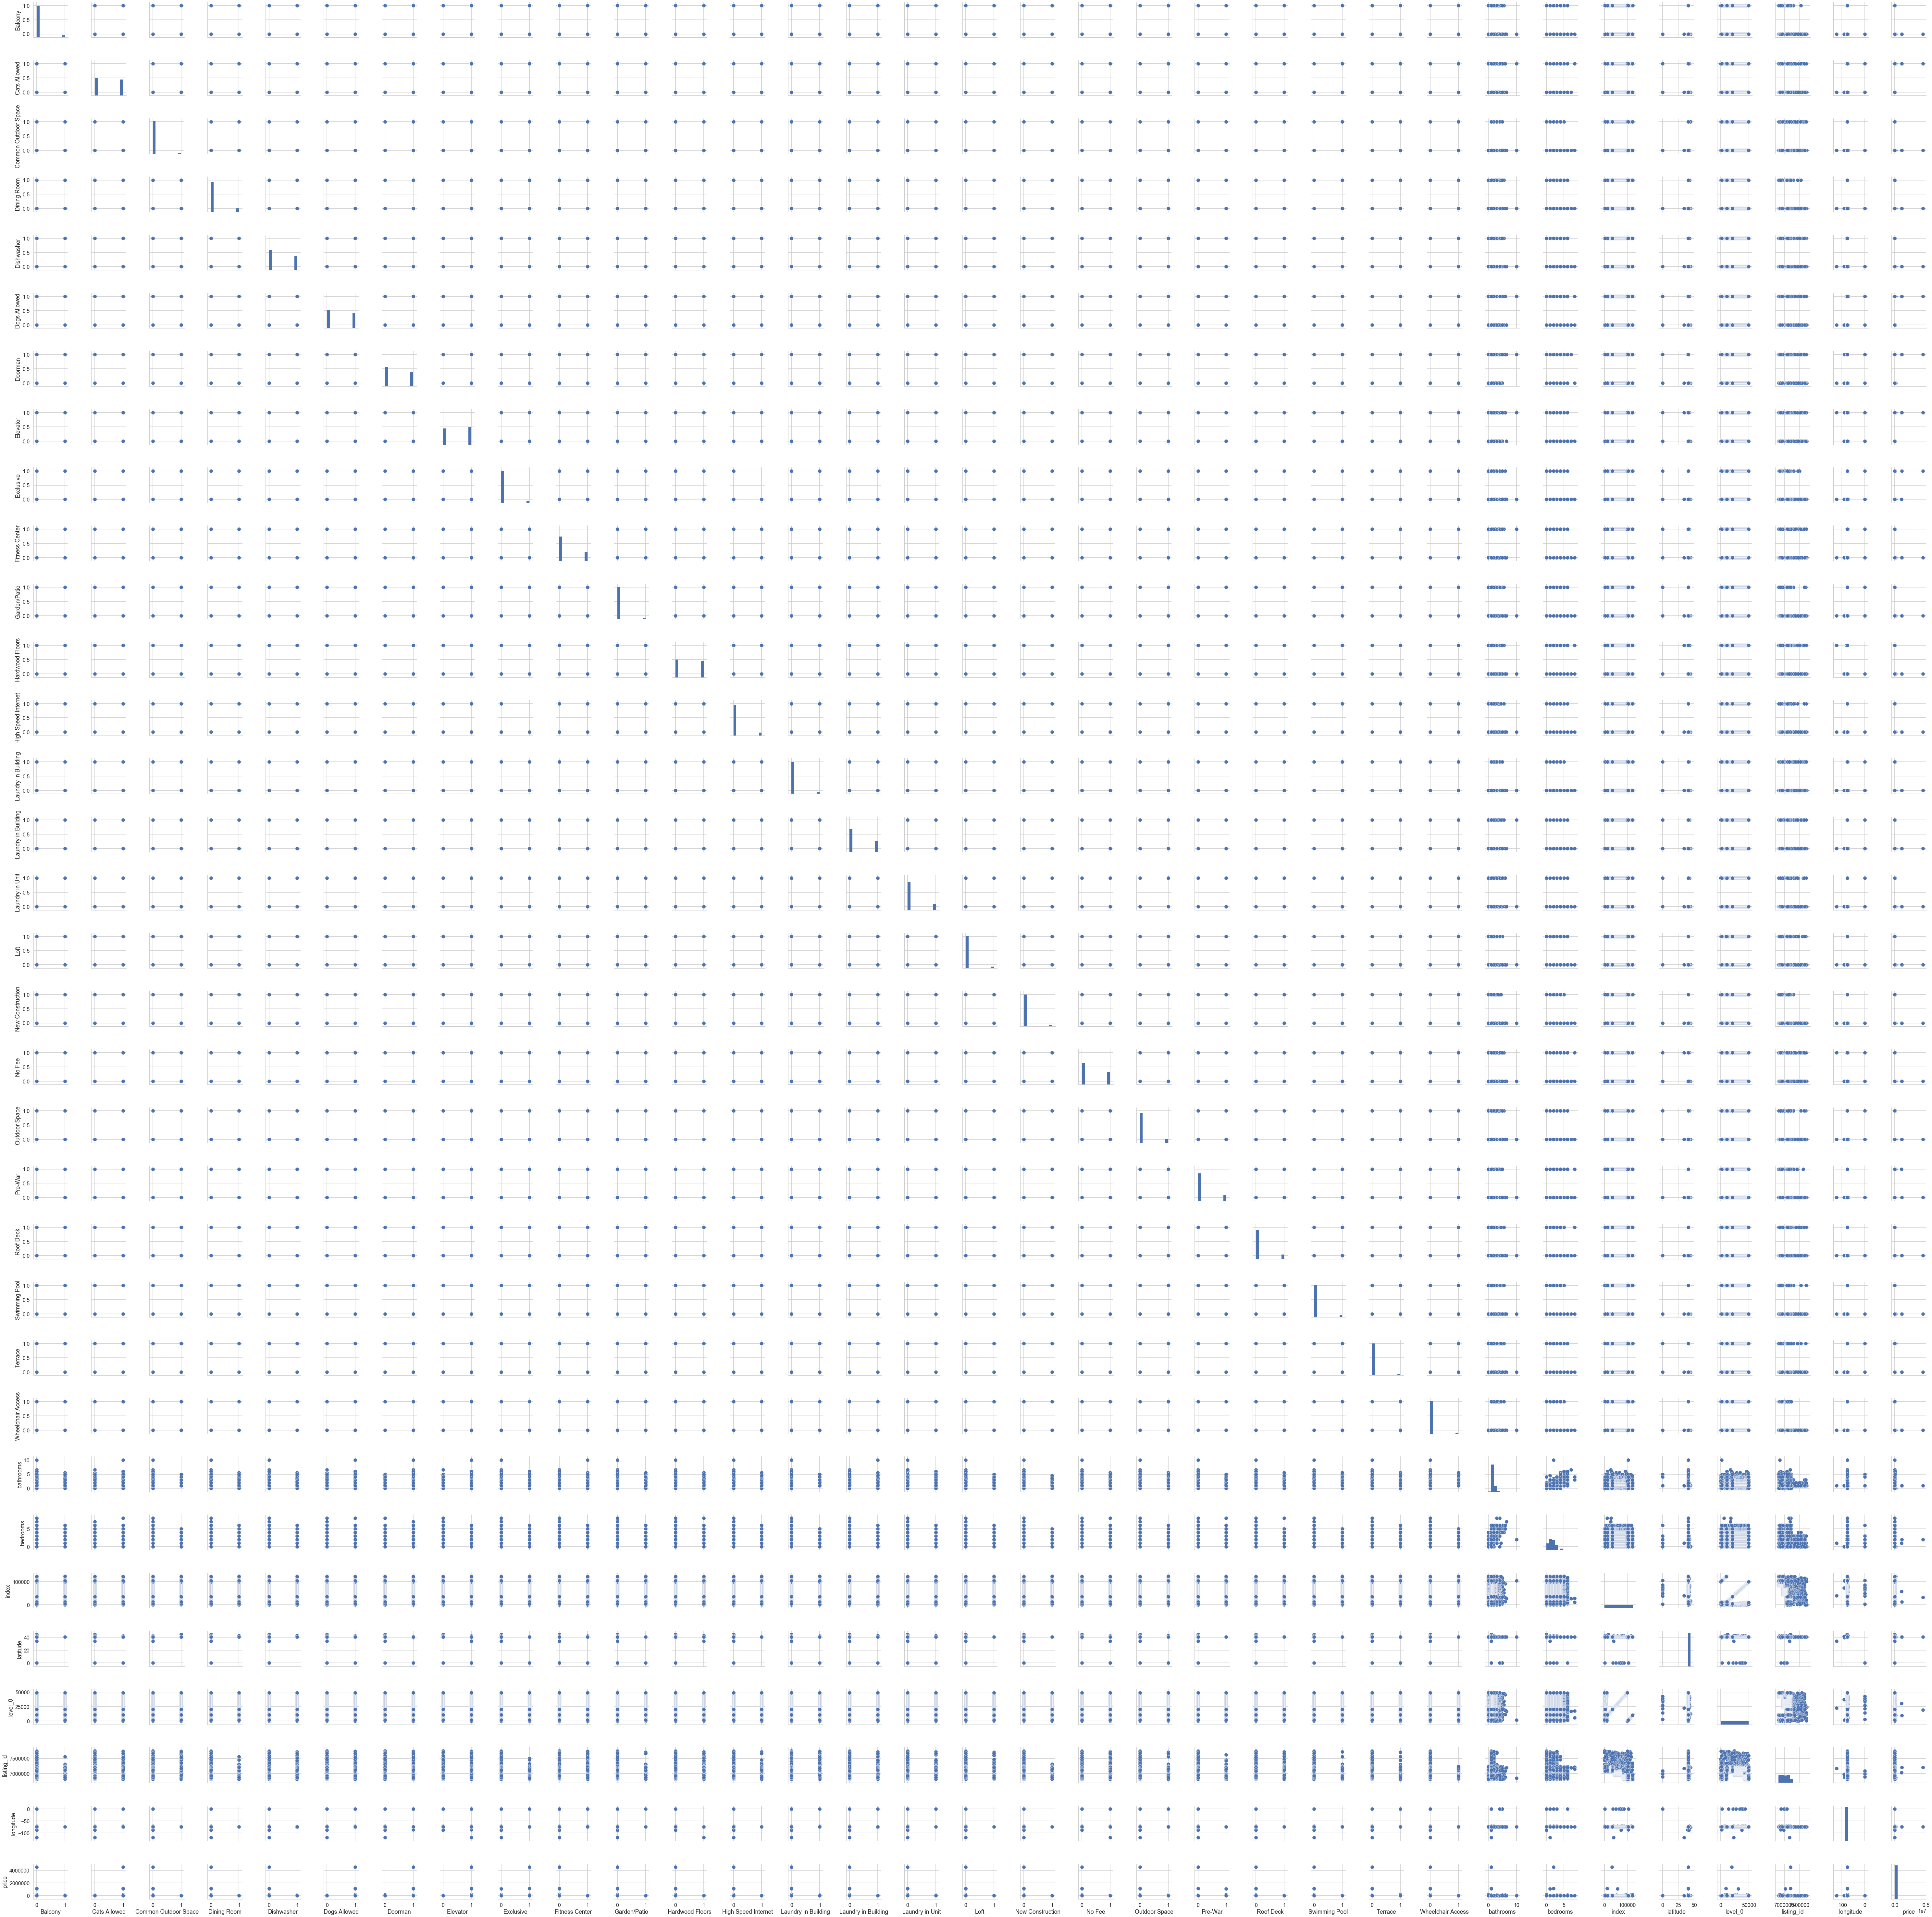

In [4]:
# Pairwise Plot of Data
sns.pairplot(df)

In [7]:
def interestValues(x):
    if 'low' in x:
        return 0
    elif 'med' in x:
        return .5
    else:
        return 1

In [8]:
df['interestVal'] = df['interest_level'].apply(interestValues)

In [9]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [10]:
df.interestVal.value_counts()

0.0    29147
0.5     9491
1.0     3280
Name: interestVal, dtype: int64

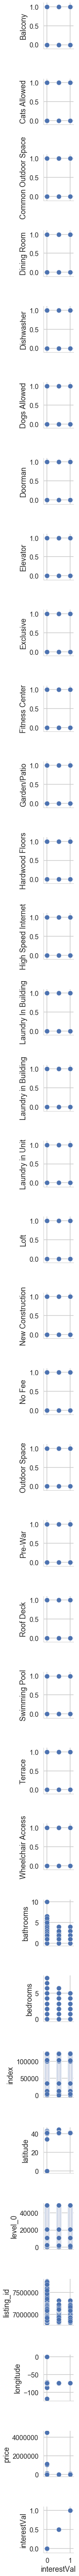

In [77]:
cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df, x_vars=['interestVal'], y_vars=cols)
plt.savefig('interestLevelPairwise.png')

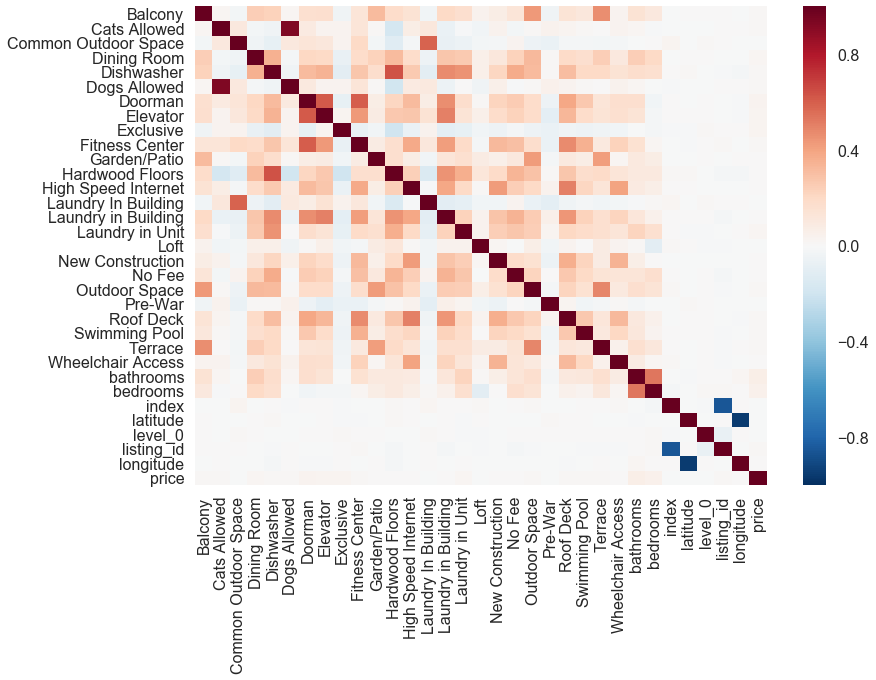

In [7]:
# Correlation Matrix of Data
sns.heatmap(df.corr())

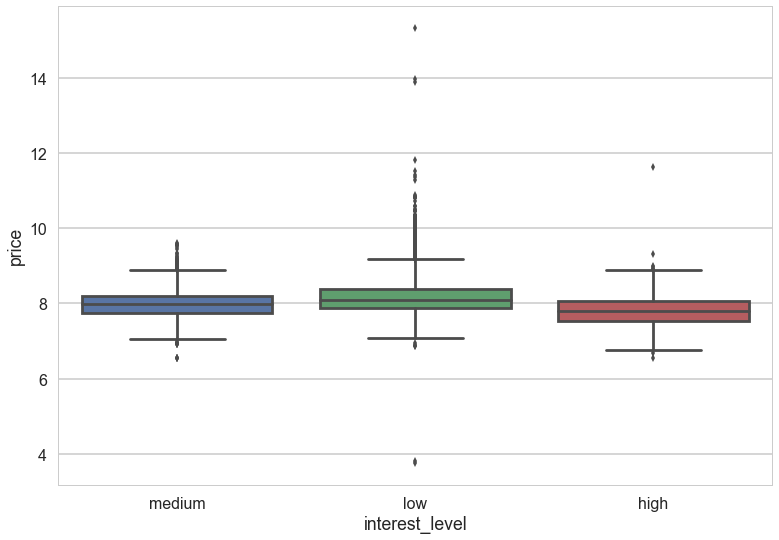

In [3]:
# Side by Side Box Plot of log(Price) vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['price'].apply(np.log))

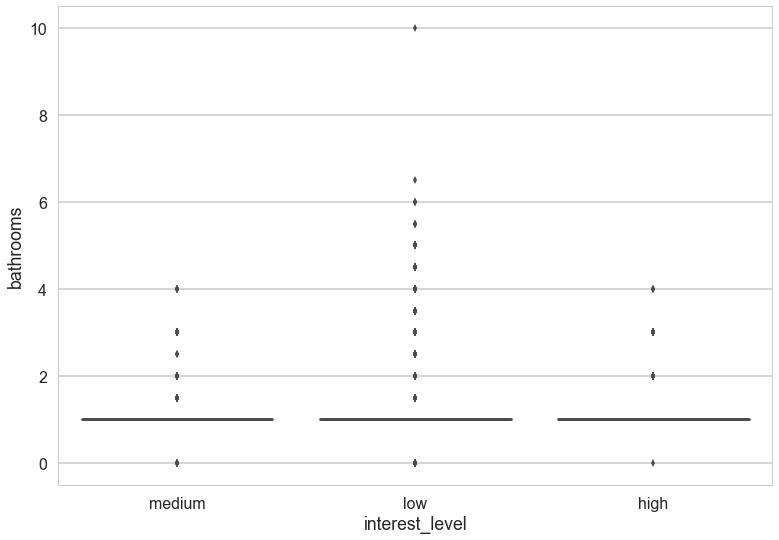

In [11]:
# Side by Side Box Plot of Bathrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bathrooms'])

In [15]:
df['bedrooms'] = df['bedrooms'].apply(float)
df['bedrooms'].fillna(0, inplace=True)
df['bathrooms'].fillna(0, inplace=True)

In [38]:
df['studio'] = df['description'].apply(lambda x : 'studio' in x.lower())

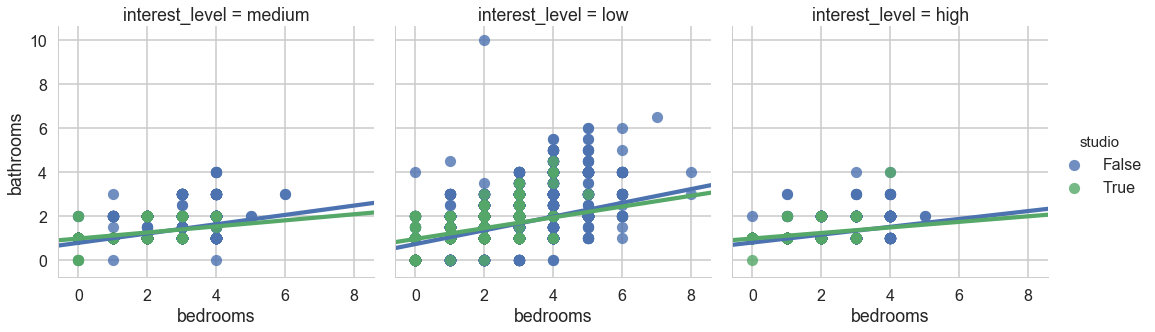

In [39]:
sns.lmplot(col='interest_level',x='bedrooms', y='bathrooms', data=df, ci=None, hue='studio')

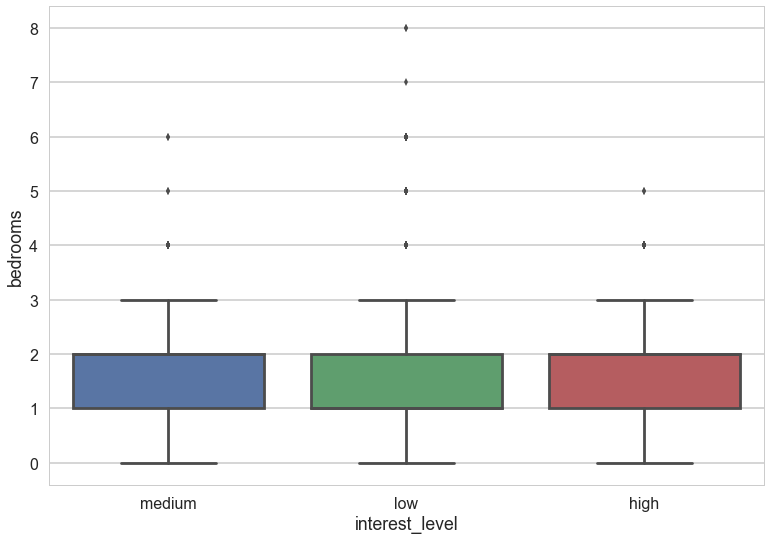

In [11]:
# Side by Side Box Plot of Bedrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bedrooms'])

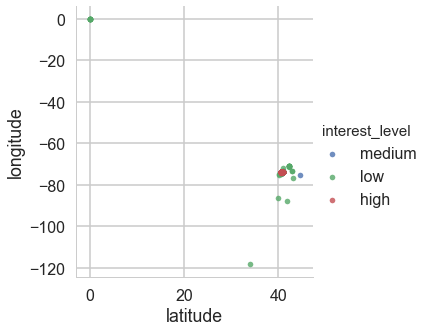

In [14]:
# See if geographical location affects interest level
sns.lmplot(x="latitude", y="longitude", hue="interest_level", data=df, fit_reg=False, legend=True, markers='.')

If we drop these two locational outliers and zoom in on the clustered points, maybe we can find something out about location... @Braden @Brianna what is the best way to remove these points?

Those points are plotted at the (lat, long) of (0, -120). This is the standard return of googlemap's api if it cannot find the address due to formatting. Therefore, we should drop them.

In [43]:
outRem = df[df['latitude'] > 5]
outRem = outRem[outRem['longitude'] > -110]

(-75.0, -72.5)

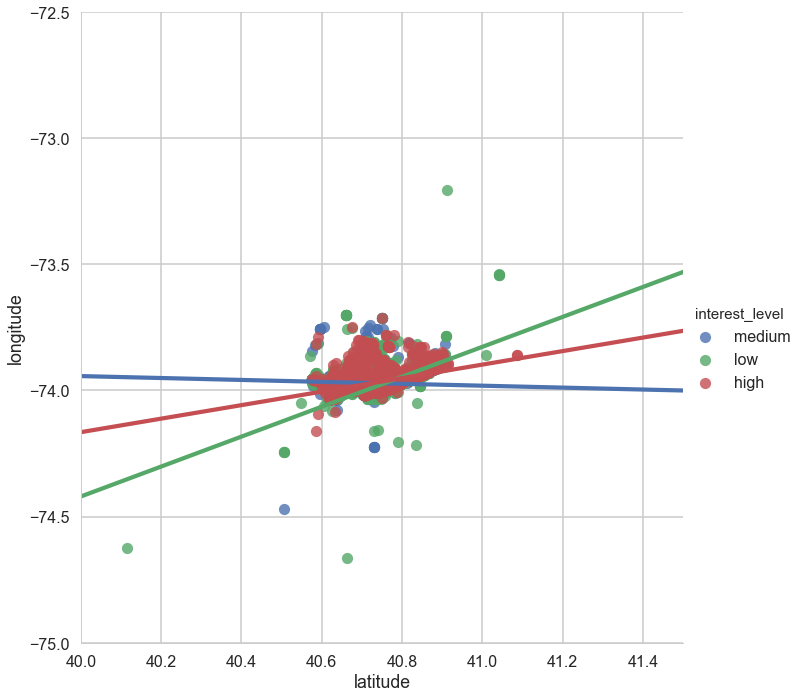

In [60]:
sns.lmplot(x='latitude', y='longitude', hue='interest_level', data = outRem, size=10, ci=False)
plt.xlim([40, 41.5])
plt.ylim([-75.0,-72.5])

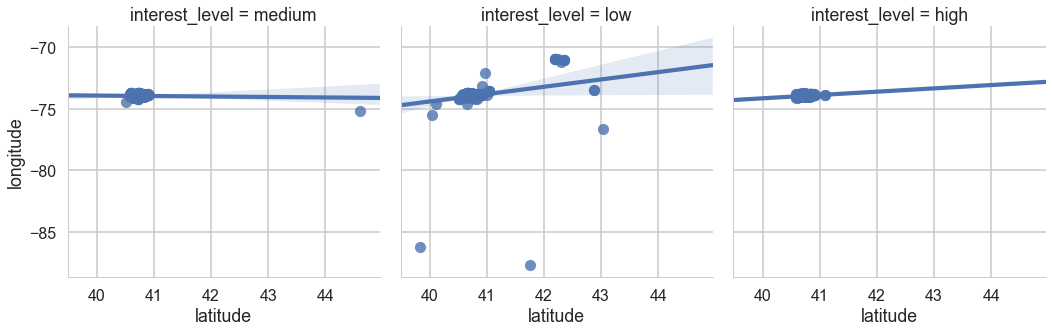

In [49]:
sns.lmplot(x='latitude', y='longitude', col='interest_level', data = outRem)

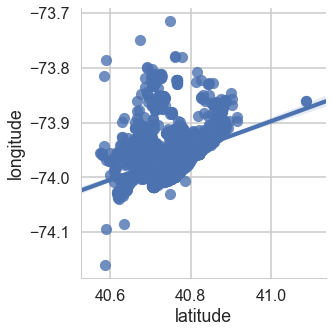

In [53]:
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='high'])

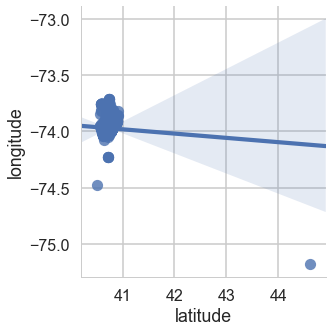

In [54]:
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='medium'])

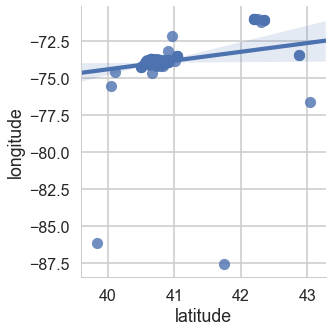

In [55]:
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='low'])

In [51]:
import statsmodels.formula.api as smf

In [52]:
df.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address
0,0,0,0,0,0,0,0,0,0,0,...,10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,0,1,0,0,0,1,1,1,0,1,...,10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
10,0,0,0,0,1,0,1,1,0,1,...,122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street
100,0,0,0,0,0,0,0,0,0,0,...,122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street
1000,0,1,0,0,1,0,1,1,0,0,...,13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.


In [53]:
df.drop('index', axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 9999
Data columns (total 41 columns):
Balcony                 41918 non-null int64
Cats Allowed            41918 non-null int64
Common Outdoor Space    41918 non-null int64
Dining Room             41918 non-null int64
Dishwasher              41918 non-null int64
Dogs Allowed            41918 non-null int64
Doorman                 41918 non-null int64
Elevator                41918 non-null int64
Exclusive               41918 non-null int64
Fitness Center          41918 non-null int64
Garden/Patio            41918 non-null int64
Hardwood Floors         41918 non-null int64
High Speed Internet     41918 non-null int64
Laundry In Building     41918 non-null int64
Laundry in Building     41918 non-null int64
Laundry in Unit         41918 non-null int64
Loft                    41918 non-null int64
New Construction        41918 non-null int64
No Fee                  41918 non-null int64
Outdoor Space           41918 non-nul

In [55]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('-', '_') for c in df.columns]
df.columns = [c.replace('/', '_') for c in df.columns]

df['highInterest'] = df['interestVal'].apply(lambda x : 1 if x == 1 else 0)

In [57]:
print(df['description'][0])

A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted 


In [ ]:
df['Studio'] = 

In [42]:
linReg = df.select_dtypes(exclude=['object'])

equation = ('+').join(linReg.drop(['interestVal'], axis=1).columns)
model = smf.ols('highInterest~'+equation, data=linReg.drop('interestVal', axis=1)).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           highInterest   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     36.38
Date:                Sat, 18 Nov 2017   Prob (F-statistic):          7.26e-221
Time:                        16:50:20   Log-Likelihood:                -3795.9
No. Observations:               41918   AIC:                             7658.
Df Residuals:                   41885   BIC:                             7943.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2504      0.114      2.194      0.028       0.027       0.474
Balcony                  0.0055      0.006      0.847      0.397      -0.007       0.018
Cats_Allowed             0.0061      0.007      0.816      0.415      -0.009       0.021
Common_Outdoor_Space    -0.0181      0.010     -1.756      0.079      -0.038       0.002
Dining_Room              0.0164      0.005      3.369      0.001       0.007       0.026
Dishwasher              -0.0128      0.004     -3.338      0.001      -0.020      -0.005
Dogs_Allowed            -0.0214      0.008     -2.850      0.004      -0.036      -0.007
Doorman                 -0.0426      0.004    -10.933      0.000      -0.050      -0.035
Elevator                -0.0048      0.004     -1.313      0.189      -0.012       0.002
Exclusive                0.0406      0.007      6.219      0.000       0.028       0.053
Fitness_Center          -0.0178      0.004     -4.251      0.000      -0.026      -0.010
Garden_Patio             0.0066      0.008      0.858      0.391      -0.008       0.022
Hardwood_Floors          0.0210      0.004      5.678      0.000       0.014       0.028
High_Speed_Internet      0.0214      0.006      3.629      0.000       0.010       0.033
Laundry_In_Building      0.1063      0.007     14.409      0.000       0.092       0.121
Laundry_in_Building      0.0050      0.004      1.304      0.192      -0.003       0.013
Laundry_in_Unit         -0.0140      0.004     -3.492      0.000      -0.022      -0.006
Loft                     0.0037      0.007      0.556      0.578      -0.009       0.017
New_Construction         0.0060      0.007      0.872      0.383      -0.007       0.020
No_Fee                   0.0409      0.003     13.180      0.000       0.035       0.047
Outdoor_Space            0.0146      0.005      2.701      0.007       0.004       0.025
Pre_War                 -0.0201      0.003     -5.865      0.000      -0.027      -0.013
Roof_Deck               -0.0077      0.005     -1.543      0.123      -0.017       0.002
Swimming_Pool            0.0004      0.006      0.065      0.948      -0.012       0.013
Terrace                  0.0034      0.008      0.449      0.653      -0.012       0.018
Wheelchair_Access        0.0136      0.009      1.516      0.129      -0.004       0.031
bathrooms               -0.0322      0.003    -10.047      0.000      -0.039      -0.026
bedrooms                 0.0037      0.001      2.538      0.011       0.001       0.006
latitude                 0.0035      0.008      0.458      0.647      -0.011       0.018
level_0               4.192e-08   9.11e-08      0.460      0.646   -1.37e-07    2.21e-07
listing_id           -2.526e-08   1.03e-08     -2.452      0.014   -4.55e-08   -5.07e-09
longitude                0.0013      0.004      0.328    